In [1]:
from ThreeDimensionalAStar import *
from X import X
from Path import PriorityQueue

from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
class FreeNode:
    def __init__(self, fK: FlooredKnot, pointsToSetFree: list[ThreeDimensionalPoint], requirements: list[ThreeDimensionalPoint] = [], notRequirements: list[ThreeDimensionalPoint] = [], previousTransforms: list[ThreeDimensionalTransform] = []):
        self.fK = fK
        self.pointsToSetFree = []
        self.previousTransforms = previousTransforms
        self.requirements = requirements
        self.notRequirements = []
        for point in pointsToSetFree+notRequirements:
            if self.fK.isOne(point):
                self.pointsToSetFree.append(point)
            else:
                self.notRequirements.append(point)

    @property
    def priority(self):
        return len(self.pointsToSetFree) + len(self.previousTransforms)

def transformsForSetFree(fK: FlooredKnot, points: list[ThreeDimensionalPoint], requirements: list[ThreeDimensionalPoint] = [],debug = False):
    if debug: print("transformsForSetFree",points, "debug:",debug)
    if fK.isZero(points):
        return []
    firstNode = FreeNode(deepcopy(fK),points,requirements)
    queue = PriorityQueue[FreeNode]()
    queue.put(firstNode.priority,firstNode)
    openList = []
    d = 0
    while not queue.isEmpty and d<1000:
        d+=1
        node = queue.get()
        if debug>0: print("          ",node.priority,node.pointsToSetFree ,node.previousTransforms)
        openList.append((node.fK, node.pointsToSetFree))
        if len(node.pointsToSetFree) == 0:
            return node.previousTransforms
        meanPoint = meanOfPoints(node.pointsToSetFree)
        allTransforms = ThreeDimensionalTransform.allPosibilitesNearbyOf(meanPoint,node.fK.fM.pointsOrdered())
        setTransforms: set[ThreeDimensionalTransform] = set()
        if debug>1: print("          Filtramos:")
        for transform in allTransforms:
            if debug>1: print("               ",transform)
            
            if transform.type == ThreeDimensionalTransformType.allInLine:
                axis = fK.typeThreeInLine(transform.point)
                if type(axis) == type(None):
                    if debug>1: print("               No se puede hacer porque es de allInline, pero no esta en una linea")
                    continue
                allPoints = fK.allPointsInLine(transform.point, axis)
                if len(allPoints) > 2:
                    transform.point = allPoints[1]
                else:
                    if debug>1: print("               No se puede hacer porque es de allInline, pero tiene dos de en linea")
                    continue
            
            setTransforms.add(transform)
        if debug>1: print("          Ya filtrados, los estudiamos hay: {}".format(len(setTransforms)))    
        for transform in setTransforms:
            if debug>1: print("               ",transform)
            auxPoints = node.fK.auxiliarPointsForTransform(transform)
            if type(auxPoints) == type(None):
                if debug>1: print("               No se puede hacer porque auxPoints es None")
                continue
            freePoints, toCompletePoints, pointsToDelete = auxPoints
            if any([p in node.requirements for p in pointsToDelete]):
                if debug>1: print("               No se puede hacer porque hay puntos a eliminar que son requerimientos")
                continue
            #if any([p in node.notRequirements for p in toCompletePoints]):
            #    if debug>1: print("               No se puede hacer porque hay puntos a completar que son no requerimientos")
            #    continue
            if node.fK.isZero(freePoints):
                if debug>1: print("               Se puede hacer, lo hacemos y generamos nuevo nodo")
                c = deepcopy(node.fK)
                c.applyTransform(transform)
                newPreviousTransforms = deepcopy(node.previousTransforms) + [transform]
                newNode = FreeNode(c,deepcopy(node.pointsToSetFree),deepcopy(node.requirements),deepcopy(node.notRequirements),newPreviousTransforms)
                if not (newNode.fK,newNode.pointsToSetFree) in openList:
                    queue.put(newNode.priority,newNode)
            else:
                if debug>1: print("               No se puede hacer porque hay puntos ocupados, pero los añadimos a freePoints y creamos nuevo nodo.")
                if debug>1: print("               Los puntos ocupados son: {}".format([p for p in freePoints if node.fK.isOne(p)]))
                newPointsToSetFree = deepcopy(node.pointsToSetFree)+freePoints
                newNode = FreeNode(deepcopy(node.fK),newPointsToSetFree,deepcopy(node.requirements),deepcopy(node.notRequirements),deepcopy(node.previousTransforms))
                if not (newNode.fK,newNode.pointsToSetFree) in openList:
                    queue.put(newNode.priority,newNode)
    return None

    

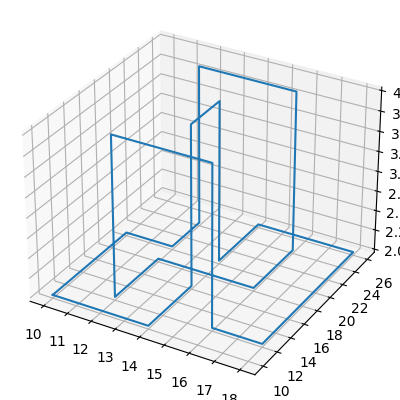

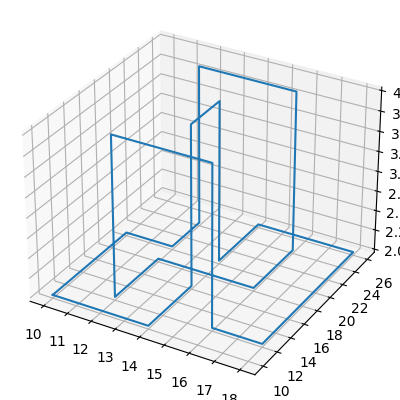

In [3]:

k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])
fK1 = FlooredKnot(k1)
fK2 = FlooredKnot(k1)

fK1.plot()

# t = ThreeDimensionalTransformType.inLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform\(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             c.plot([point,point.move(direction)])


# t = ThreeDimensionalTransformType.inCorner
# for point in fK1.fM.pointsOrdered():
#     transform = ThreeDimensionalTransform\(point,t)
#     c = deepcopy(fK1)
#     if c.applyTransform(transform):
#         c.plot([point,point.move(Axis.Z)])


# transform = ThreeDimensionalTransform\(ThreeDimensionalPoint(11,10,2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD)
# fK1.applyTransform(transform)
# fK1.plot()
# t = ThreeDimensionalTransformType.inLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     transform = ThreeDimensionalTransform\(point,t,variety=False)
#     c = deepcopy(fK1)
#     if c.applyTransform(transform):
#         c.plot([point,point.move(AxisDirection.ZU)])


# t = ThreeDimensionalTransformType.allInLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform\(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             c.plot([point,point.move(direction)])

# i=0
# t = ThreeDimensionalTransformType.doubleAllInLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             if i>5:
#                 raise Exception(")")
#             print(transform)
#             c.plot([point,point.move(direction)])
#             plt.pause(0.005)

# t = ThreeDimensionalTransformType.inCornerForSide
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         for v in [True,False]:
#             transform = ThreeDimensionalTransform(point,t,variety=v,direction=direction)
#             c = deepcopy(fK1)
#             if c.applyTransform(transform):
#                 c.plot([point,point.move(direction)])


# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,12)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,13)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,14)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,15)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,16)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,17)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))

# t = ThreeDimensionalTransformType.allInLineDoubleDirection
# for point in fK1.fM.pointsOrdered():
#     for variety in [False, True]:
#         transform = ThreeDimensionalTransform(point,t,variety=variety)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             print(variety)
#             c.plot([point,point.move(AxisDirection.ZU)])

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,variety=False)
# print(fK1.applyTransform(transform))

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,16,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,18,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,18,26)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))


# transforms = transformsForSetFree(fK1,[ThreeDimensionalPoint(12,18,2)],[ThreeDimensionalPoint(12,17,2)])
# for transform in transforms:
#     fK1.applyTransform(transform)

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint(12,24,2),ThreeDimensionalTransformType.switchSide,False,AxisDirection.XD)
# print(fK1.applyTransform(transform))

# print(fK1.reducesLength())

fK1.plot()

# print(fK1.undoAllInLine(ThreeDimensionalPoint((2,9,15))))
# fK1.plot()

In [25]:

class ThreeDimensionalNode:
    def __init__(self, fK: FlooredKnot, transforms: list[ThreeDimensionalTransform] = []):
       
        self.fK = deepcopy(fK)
        self.transforms = deepcopy(transforms)
    
    def successors(self, points = None, debug = False):
        if points == None:
            points = self.fK.fM.pointsOrdered()
        aux: list[ThreeDimensionalNode] = []
        for point in points:
            for transform in ThreeDimensionalTransform.allPosibilitesIn(point):
                successor = deepcopy(self)
                if successor.applyTransform(transform, debug=debug):
                    aux.append(successor)
        return aux
    
    def nearbySuccessors(self, point: ThreeDimensionalPoint = None, debug = False):
        if type(point) == type(None):
            lastPoint = point
        else:
            if len(self.transforms) == 0:
                return self.successors()
            lastPoint = self.transforms[-1].point
        points = nearbyPointsOf(lastPoint, self.fK.fM.pointsOrdered())
        return self.successors(points, debug=debug)

    def applyTransform(self, transform: ThreeDimensionalTransform, debug = False):
        if debug: print(transform)
        if self.fK.applyTransform(transform,debug=debug):
            self.transforms.append(transform)
            return True
        return False

    def checkTargets(self,targets:list[ThreeDimensionalTarget], debug = False, direction: bool):
        if len(targets) == 1:
            return self.fK.isOne(targets[0].point)
        if len(targets) == 0:
            return True
        allPoints = self.fK.fM.pointsOrdered()
        indexOfFirstTarget = allPoints.index(targets[0].point)
        if debug: 
            print("allPoints", allPoints)
            print("indexOfFirstTarget",indexOfFirstTarget)
        for i in range(len(targets)):
            point = targets[i].point
            orderedPoint = allPoints[(indexOfFirstTarget+i)%len(allPoints)]
            if debug: 
                print("Chequeando", point)
                print("orderedPoint", orderedPoint)
            if point != orderedPoint:
                return False
        return True

    def printTargetCompletes(self,targets:list[ThreeDimensionalTarget], debug = False):
        for i in range(len(targets)+1):
            if debug: print("Chequeando {}".format([t.point for t in targets[:i]]))
            if not self.checkTargets(targets[:i], debug=debug):
                print("Targets Completes:",i-1)
                print("Transforms:",len(self.transforms))
                return         
    
    def firstPriority(self,point:ThreeDimensionalPoint):
        return distance(point,self.fK.fM.pointsOrdered()) + len(self.transforms) 

    def middlePriority(self,requirementsPoints:list[ThreeDimensionalPoint], point: ThreeDimensionalPoint):
        points = [point for point in self.fK.fM.pointsOrdered() if not point in requirementsPoints]
        return distance(point,points) + len(self.transforms)

    @property
    def difference(self):
        start = time()
        objetivePoints = self.target.fM.pointsOrdered()
        if self.fK.isZero(objetivePoints[0]):
            result = len(objetivePoints) + distance(objetivePoints[0],self.fK.fM.pointsOrdered())
            return result
        result = len(objetivePoints)
        bucleComplete = True
        for point in objetivePoints:
            if self.fK.isOne(point):
                result-=1
            else:
                bucleComplete = False
                break
        reversePoints = objetivePoints[1:]
        reversePoints.reverse()
        if not bucleComplete:
            for point in reversePoints:
                if self.fK.isOne(point):
                    result-=1
                else:
                    break
        #print(time()-start)
        return result

    @property
    def priority(self):
        return self.difference + len(self.transforms)/2


class ThreeDimensionalAlgorithm:
    def __init__(self, knot1: CustomKnot, targetKnot: CustomKnot):
        fK = FlooredKnot(knot1)
        self.target = FlooredKnot(targetKnot)
        fK, self.target = equalizeShapes(fK,self.target)
        if fK.fM.baseMatrix.shape != self.target.fM.baseMatrix.shape:
            raise Exception("The shape between these nodes does not match.{} {}".format(fK.fM.baseMatrix.shape,self.target.fM.baseMatrix.shape))
        self.node = ThreeDimensionalNode(fK)
        self.targets = self.target.targets

    def plot(self):
        points = self.node.fK.fM.pointsOrdered()
        points.append(points[0])
        self.target.plot(points)

    def printTargetCompletes(self,debug = False):
        self.node.printTargetCompletes(self.targets, debug=debug)

    def completeFirstTarget(self, debug = False):
        point = self.targets[0].point
        if self.node.checkTargets([self.targets[0]]):
            return
        queue = PriorityQueue[ThreeDimensionalNode]()
        queue.put(self.node.firstPriority(point),self.node)
        openList = []
        while True:
            node = queue.get()
            if debug: 
                print("NewNode")
                print(node.transforms)
            openList.append(node.fK)
            for successor in node.nearbySuccessors(point=point):
                if successor.fK in openList:
                    continue

                if successor.checkTargets(self.targets[0]):
                    print(successor.transforms)
                    self.node = successor
                    return

                queue.put(successor.firstPriority(point), successor)
        
    def completeMiddleTarget(self,i:int, debug = False):
        if debug>0: print("completeMiddleTarget: {}".format(i))
        if i < 1 or i > len(self.targets)-2:
            raise Exception("Ese target no es de en medio")
        requirements = self.targets[:i]
        requirementsPoints = [target.point for target in requirements]
        target = self.targets[i]
        targetPoint = target.point
        if debug>0: 
            print("targetPoint:",targetPoint)
            print("requirementsPoints:",requirementsPoints)
            #self.node.fK.plot(requirementsPoints)
        if not self.node.checkTargets(requirements):
            raise Exception("Los anteriores targets no están completados.")
        if self.node.checkTargets(requirements+[target]):
            if debug>0: print("ya están completados")
            return
        if debug>0: print("reducesLength")
        reduceLengthTransforms = self.node.fK.reducesLength(requirementsPoints)
        if debug>0: print("reduceLengthTransforms: {}".format(len(reduceLengthTransforms)))
        self.node.transforms += reduceLengthTransforms
        if self.node.checkTargets(requirements+[target]):
            if debug>0: print("ya están completados después de reducir la longitud")
            return

        possibleTransforms = self.node.fK.transformsThatCompletePoints(targetPoint, debug=debug-1)
        if debug>0: print("Las posibles transformaciones son: {}".format(len(possibleTransforms)))
        auxiliarPointsDict: dict[ThreeDimensionalTransform,tuple[list[ThreeDimensionalPoint],list[ThreeDimensionalPoint],list[ThreeDimensionalPoint]]] = {}
        newPossibleTransforms: list[tuple[ThreeDimensionalTransform,int]] = []
        if debug>1: 
            self.plot()
            plt.pause(0.00005)
        if debug>0: print("Estudiamos las posibles transformaciones")
        for transform in possibleTransforms:
            if debug>1: print("     Estudiando la transformación {}".format(transform))
            auxiliarPoints = self.node.fK.auxiliarPointsForTransform(transform)
            if type(auxiliarPoints)  == type(None):
                if debug>1: print("     Esta transformación no es posible hacerla")
                continue
            freePoints, toCompletePoints, pointsToDelete = auxiliarPoints
            if debug>1: print("     freePoints      : {}".format(freePoints))
            if debug>1: print("     toCompletePoints: {}".format(toCompletePoints))
            if debug>1: print("     pointsToDelete  : {}".format(pointsToDelete))
            if any([p in requirementsPoints for p in pointsToDelete]):
                if debug>1: print("     Esta transformación no cumple los requirements, por los pointToDelete")
                continue
            if any([p in requirementsPoints for p in freePoints]):
                if debug>1: print("     Esta transformación no cumple los requirements, por los freePoints")
                continue
            priority = len([p for p in freePoints if self.node.fK.isOne(p)])
            newPossibleTransforms.append((transform, priority))
            if debug>1: 
                print("     La añadimos con priority {}".format(priority))
                print("     Los puntos que no se pueden son: {}".format([p for p in freePoints if self.node.fK.isOne(p)]))
            auxiliarPointsDict[transform] = auxiliarPoints
        if debug>0: print("Ordenamos las posibles transformaciones")
        newPossibleTransforms.sort(key=lambda tup: tup[1])
        possibleTransforms = [tup[0] for tup in newPossibleTransforms]

        if debug>0: print("Las posibles transformaciones filtradas son: {}".format(len(possibleTransforms)))
        if len(possibleTransforms) == 0:
            raise Exception("No hay ninguna transformación que complete este target.")
        if debug>0: print("Probamos con las posibles transformaciones")
        for transform in possibleTransforms:
            if debug>1: print("     Probamos con la transformación {}".format(transform))
            freePoints, toCompletePoints, pointsToDelete = auxiliarPointsDict[transform]
            transformsForFree = transformsForSetFree(self.node.fK,freePoints,requirementsPoints+pointsToDelete,debug=debug-1)
            if type(transformsForFree) == type(None):
                if debug>1: print("     Esta transformación no se puede hacer porque hay puntos que no se pueden liberar")
                continue
            transforms = transformsForFree + [transform]
            if debug>1: print("     Intentamos hacer las transformaciones {}".format(transforms))
            c = deepcopy(self.node)
            if all([c.applyTransform(t) for t in transforms]):
                self.node = c
                if debug>0: print("Completado")
                return
            if debug>1: print("     Estas transformaciones no se han podido hacer.")
            break # Este break?
            

    def completeLastTarget(self,debug = False):
        pass

    def completeTarget(self,i:int, debug = False):
        target = self.targets[i]
        if target.isFirst:
            self.completeFirstTarget(debug=debug)
        elif target.isLast:
            self.completeLastTarget(debug=debug)
        else:
            self.completeMiddleTarget(i,debug=debug)
        

In [26]:
transformsCheck = [ThreeDimensionalTransform(ThreeDimensionalPoint(8, 13, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(8, 12, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(8, 11, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 11, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 11, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 11, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 11, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 11, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 12, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 12, 2),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 15, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 15, 3),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 15, 4),ThreeDimensionalTransformType.inCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 13, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 13, 2),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 14, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 19, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 20, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 17, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 21, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 21, 1),ThreeDimensionalTransformType.allInLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 21, 1),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 19, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 20, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 23, 3),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 21, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 22, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 15, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 16, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 19, 2),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 20, 2),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 21, 2),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 22, 2),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 24, 4),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 24, 3),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 17, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 18, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 19, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 20, 4),ThreeDimensionalTransformType.slideCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 21, 1),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(10, 21, 1),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 21, 1),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(7, 11, 2),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(8, 11, 2),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 23, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 29, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 27, 1),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 25, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 30, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 28, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 26, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 29, 3),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 31, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 29, 2),ThreeDimensionalTransformType.allInLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 27, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 27, 4),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 27, 4),ThreeDimensionalTransformType.doubleAllInLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 28, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 22, 4),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 28, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(11, 30, 2),ThreeDimensionalTransformType.doubleAllInLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(10, 30, 4),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 28, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 28, 4),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 28, 3),ThreeDimensionalTransformType.allInLine,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 31, 3),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 29, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 30, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 31, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 32, 2),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 31, 2),ThreeDimensionalTransformType.inCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 32, 2),ThreeDimensionalTransformType.inCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 32, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 32, 1),ThreeDimensionalTransformType.inCorner,None,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 32, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(16, 30, 4),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,True,None),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 32, 2),ThreeDimensionalTransformType.switchSide,False,AxisDirection.YU),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 33, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(16, 33, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 33, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(18, 32, 2),ThreeDimensionalTransformType.switchSide,True,AxisDirection.XU),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 31, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 30, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 29, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 28, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 27, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 26, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 25, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 24, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 23, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 22, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 21, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 20, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 19, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(18, 18, 2),ThreeDimensionalTransformType.switchSide,False,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 17, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XD),
ThreeDimensionalTransform(ThreeDimensionalPoint(16, 17, 2),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(16, 17, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZU),
ThreeDimensionalTransform(ThreeDimensionalPoint(16, 17, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.XD),
ThreeDimensionalTransform(ThreeDimensionalPoint(15, 17, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.XD),
ThreeDimensionalTransform(ThreeDimensionalPoint(14, 17, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.XD),
ThreeDimensionalTransform(ThreeDimensionalPoint(13, 17, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.XD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 17, 4),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 17, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.ZD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 16, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 15, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 14, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 13, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD),
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 16, 2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU), 
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 16, 3),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU), 
ThreeDimensionalTransform(ThreeDimensionalPoint(20, 17, 4),ThreeDimensionalTransformType.allInLine,False,None), 
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 17, 4),ThreeDimensionalTransformType.allInLine,False,None), 
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 10, 2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.XD), 
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 12, 2),ThreeDimensionalTransformType.inCornerForSide,False,AxisDirection.XU)]
transforms = transformsCheck

Chequeando []
Chequeando [(x: 10, y: 10, z:2)]
Chequeando [(x: 10, y: 10, z:2), (x: 11, y: 10, z:2)]
allPoints [(x: 10, y: 12, z:0), (x: 11, y: 12, z:0), (x: 12, y: 12, z:0), (x: 13, y: 12, z:0), (x: 13, y: 12, z:1), (x: 13, y: 12, z:2), (x: 12, y: 12, z:2), (x: 12, y: 13, z:2), (x: 12, y: 14, z:2), (x: 12, y: 15, z:2), (x: 12, y: 16, z:2), (x: 12, y: 17, z:2), (x: 12, y: 18, z:2), (x: 12, y: 18, z:3), (x: 12, y: 18, z:4), (x: 13, y: 18, z:4), (x: 14, y: 18, z:4), (x: 15, y: 18, z:4), (x: 16, y: 18, z:4), (x: 16, y: 18, z:3), (x: 16, y: 18, z:2), (x: 17, y: 18, z:2), (x: 18, y: 18, z:2), (x: 18, y: 19, z:2), (x: 18, y: 20, z:2), (x: 18, y: 21, z:2), (x: 18, y: 22, z:2), (x: 18, y: 23, z:2), (x: 18, y: 24, z:2), (x: 18, y: 25, z:2), (x: 18, y: 26, z:2), (x: 18, y: 27, z:2), (x: 18, y: 28, z:2), (x: 18, y: 29, z:2), (x: 18, y: 30, z:2), (x: 18, y: 31, z:2), (x: 18, y: 32, z:2), (x: 17, y: 32, z:2), (x: 16, y: 32, z:2), (x: 15, y: 32, z:2), (x: 14, y: 32, z:2), (x: 14, y: 32, z:3), (x: 14

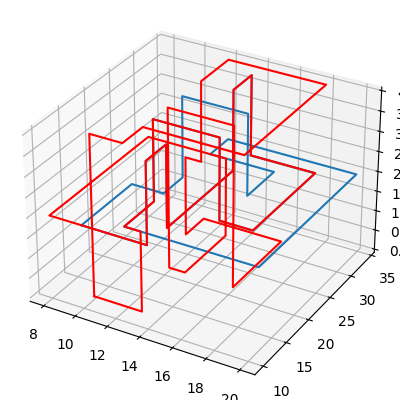

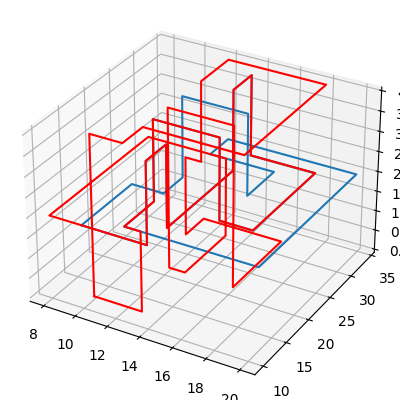

In [27]:
k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])

algorithm = ThreeDimensionalAlgorithm(k1,k2)
# algorithm.plot()
for t in transforms:
    
    algorithm.node.applyTransform(t)
algorithm.plot()

requirementsPoints = [ThreeDimensionalPoint(10, 10, 2), 
ThreeDimensionalPoint(11, 10, 2), 
ThreeDimensionalPoint(12, 10, 2), 
ThreeDimensionalPoint(13, 10, 2), 
ThreeDimensionalPoint(14, 10, 2), 
ThreeDimensionalPoint(14, 10, 3), 
ThreeDimensionalPoint(14, 10, 4), 
ThreeDimensionalPoint(14, 11, 4), 
ThreeDimensionalPoint(14, 12, 4), 
ThreeDimensionalPoint(14, 13, 4), 
ThreeDimensionalPoint(14, 14, 4), 
ThreeDimensionalPoint(14, 14, 3), 
ThreeDimensionalPoint(14, 14, 2), 
ThreeDimensionalPoint(14, 15, 2), 
ThreeDimensionalPoint(14, 16, 2), 
ThreeDimensionalPoint(14, 17, 2), 
ThreeDimensionalPoint(14, 18, 2), 
ThreeDimensionalPoint(14, 19, 2), 
ThreeDimensionalPoint(14, 20, 2),
ThreeDimensionalPoint(14, 21, 2), 
ThreeDimensionalPoint(14, 22, 2), 
ThreeDimensionalPoint(14, 23, 2), 
ThreeDimensionalPoint(14, 24, 2), 
ThreeDimensionalPoint(14, 25, 2), 
ThreeDimensionalPoint(14, 26, 2), 
ThreeDimensionalPoint(14, 27, 2), 
ThreeDimensionalPoint(14, 28, 2), 
ThreeDimensionalPoint(14, 28, 3), 
ThreeDimensionalPoint(14, 28, 4), 
ThreeDimensionalPoint(14, 29, 4), 
ThreeDimensionalPoint(14, 30, 4), 
ThreeDimensionalPoint(14, 31, 4), 
ThreeDimensionalPoint(14, 32, 4), 
ThreeDimensionalPoint(14, 32, 3), 
ThreeDimensionalPoint(14, 32, 2), 
ThreeDimensionalPoint(15, 32, 2), 
ThreeDimensionalPoint(16, 32, 2), 
ThreeDimensionalPoint(17, 32, 2), 
ThreeDimensionalPoint(18, 32, 2), 
ThreeDimensionalPoint(18, 31, 2), 
ThreeDimensionalPoint(18, 30, 2), 
ThreeDimensionalPoint(18, 29, 2), 
ThreeDimensionalPoint(18, 28, 2), 
ThreeDimensionalPoint(18, 27, 2), 
ThreeDimensionalPoint(18, 26, 2), 
ThreeDimensionalPoint(18, 25, 2), 
ThreeDimensionalPoint(18, 24, 2), 
ThreeDimensionalPoint(18, 23, 2), 
ThreeDimensionalPoint(18, 22, 2), 
ThreeDimensionalPoint(18, 21, 2), 
ThreeDimensionalPoint(18, 20, 2), 
ThreeDimensionalPoint(18, 19, 2), 
ThreeDimensionalPoint(18, 18, 2), 
ThreeDimensionalPoint(17, 18, 2), 
ThreeDimensionalPoint(16, 18, 2), 
ThreeDimensionalPoint(16, 18, 3), 
ThreeDimensionalPoint(16, 18, 4), 
ThreeDimensionalPoint(15, 18, 4), 
ThreeDimensionalPoint(14, 18, 4), 
ThreeDimensionalPoint(13, 18, 4), 
ThreeDimensionalPoint(12, 18, 4), 
ThreeDimensionalPoint(12, 18, 3), 
ThreeDimensionalPoint(12, 18, 2), 
ThreeDimensionalPoint(12, 17, 2), 
ThreeDimensionalPoint(12, 16, 2), 
ThreeDimensionalPoint(12, 15, 2), 
ThreeDimensionalPoint(12, 14, 2), 
ThreeDimensionalPoint(12, 13, 2), 
ThreeDimensionalPoint(12, 12, 2)]

# t = ThreeDimensionalTransform(ThreeDimensionalPoint(20,20,2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU)
# algorithm.node.applyTransform(t)
# t = ThreeDimensionalTransform(ThreeDimensionalPoint(20,20,3),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU)
# algorithm.node.applyTransform(t)


algorithm.plot()
algorithm.printTargetCompletes(True)

In [24]:

k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])

algorithm = ThreeDimensionalAlgorithm(k1,k2)
# algorithm.plot()
for t in transforms:
    
    algorithm.node.applyTransform(t)

i=60
while i <70:
    print("---------")
    # print(algorithm.node.transforms)
    algorithm.completeTarget(i,debug=1)
    #print(algorithm.node.transforms)
    algorithm.printTargetCompletes()
    # algorithm.plot()
    i+=1
transforms = algorithm.node.transforms
print(algorithm.node.transforms)
algorithm.plot()
# plt.pause(0.00005)
# algorithm.completeTarget(i,debug= 2)
# algorithm.printTargetCompletes()
# algorithm.plot()




---------
completeMiddleTarget: 60
targetPoint: (x: 12, y: 18, z:4)
requirementsPoints: [(x: 10, y: 10, z:2), (x: 11, y: 10, z:2), (x: 12, y: 10, z:2), (x: 13, y: 10, z:2), (x: 14, y: 10, z:2), (x: 14, y: 10, z:3), (x: 14, y: 10, z:4), (x: 14, y: 11, z:4), (x: 14, y: 12, z:4), (x: 14, y: 13, z:4), (x: 14, y: 14, z:4), (x: 14, y: 14, z:3), (x: 14, y: 14, z:2), (x: 14, y: 15, z:2), (x: 14, y: 16, z:2), (x: 14, y: 17, z:2), (x: 14, y: 18, z:2), (x: 14, y: 19, z:2), (x: 14, y: 20, z:2), (x: 14, y: 21, z:2), (x: 14, y: 22, z:2), (x: 14, y: 23, z:2), (x: 14, y: 24, z:2), (x: 14, y: 25, z:2), (x: 14, y: 26, z:2), (x: 14, y: 27, z:2), (x: 14, y: 28, z:2), (x: 14, y: 28, z:3), (x: 14, y: 28, z:4), (x: 14, y: 29, z:4), (x: 14, y: 30, z:4), (x: 14, y: 31, z:4), (x: 14, y: 32, z:4), (x: 14, y: 32, z:3), (x: 14, y: 32, z:2), (x: 15, y: 32, z:2), (x: 16, y: 32, z:2), (x: 17, y: 32, z:2), (x: 18, y: 32, z:2), (x: 18, y: 31, z:2), (x: 18, y: 30, z:2), (x: 18, y: 29, z:2), (x: 18, y: 28, z:2), (x: 18, 

Exception: Los anteriores targets no están completados.

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Targets Completes: 69
Transforms: 108


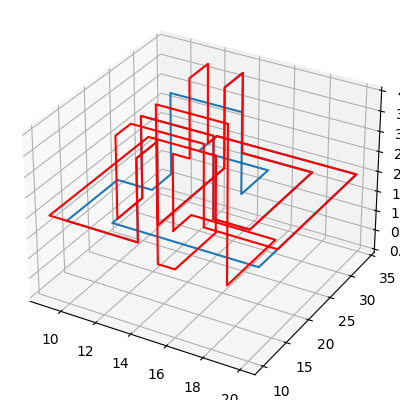

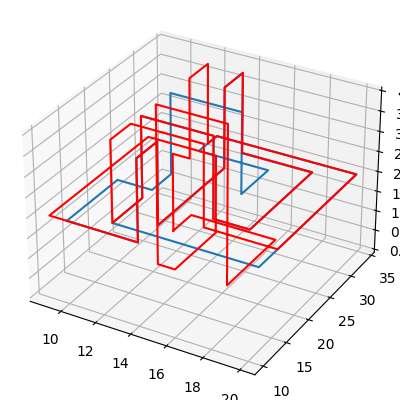

In [7]:
transforms2 = ThreeDimensionalTransform(ThreeDimensionalPoint(17, 16, 2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU), 
ThreeDimensionalTransform(ThreeDimensionalPoint(17, 16, 3),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.ZU), 
ThreeDimensionalTransform(ThreeDimensionalPoint(20, 17, 4),ThreeDimensionalTransformType.allInLine,False,None), 
ThreeDimensionalTransform(ThreeDimensionalPoint(19, 17, 4),ThreeDimensionalTransformType.allInLine,False,None), 
ThreeDimensionalTransform(ThreeDimensionalPoint(9, 10, 2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.XD), 
ThreeDimensionalTransform(ThreeDimensionalPoint(12, 12, 2),ThreeDimensionalTransformType.inCornerForSide,False,AxisDirection.XU)



k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])

algorithm = ThreeDimensionalAlgorithm(k1,k2)
# algorithm.plot()
for t in transforms2:
    
    print(algorithm.node.applyTransform(t))

algorithm.plot()
t = ThreeDimensionalTransform(ThreeDimensionalPoint(12, 13, 3),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD)
print(algorithm.node.applyTransform(t))
algorithm.plot()
algorithm.printTargetCompletes()

In [ ]:
image = k.image()

fig, ax = plt.subplots()#figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

In [7]:
a = [1,2,3,4,5,6,7,8,9,10]
for i in range(len(a)+1):
    print(a[:i])
print(a[2:-2])

[]
[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3, 4, 5, 6, 7, 8]


In [8]:
a = set(range(5))
b = set(range(7))
c = set(range(3,10))
print(a)
print(b)
print(c)


{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, 5, 6}
{3, 4, 5, 6, 7, 8, 9}


In [9]:
set().union(b).difference(c)

{0, 1, 2}

In [8]:
s = set([2,5,6,12])
a = [1,2,3,4,5,6,7,8,9,10]
print(s)
s.update(a)
print(s)

{2, 12, 5, 6}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
